# 天气预测模型

## 数据处理

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 指定 STHeiti Medium 字体路径
zh_font = fm.FontProperties(fname='/System/Library/Fonts/STHeiti Medium.ttc')

# 设置 matplotlib 使用这个字体
plt.rcParams['font.family'] = zh_font.get_name()
plt.rcParams['axes.unicode_minus'] = False





df = pd.read_csv("data/GlobalWeatherRepository.csv")

print("数据维度:", df.shape)
df.head()

数据维度: (69967, 41)


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [99]:
# 查看所有字段和类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69967 entries, 0 to 69966
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       69967 non-null  object 
 1   location_name                 69967 non-null  object 
 2   latitude                      69967 non-null  float64
 3   longitude                     69967 non-null  float64
 4   timezone                      69967 non-null  object 
 5   last_updated_epoch            69967 non-null  int64  
 6   last_updated                  69967 non-null  object 
 7   temperature_celsius           69967 non-null  float64
 8   temperature_fahrenheit        69967 non-null  float64
 9   condition_text                69967 non-null  object 
 10  wind_mph                      69967 non-null  float64
 11  wind_kph                      69967 non-null  float64
 12  wind_degree                   69967 non-null  int64  
 13  w

In [100]:
# 缺失值统计
df.isnull().sum().sort_values(ascending=False)

country                         0
feels_like_fahrenheit           0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Nitrogen_dioxide    0
air_quality_Sulphur_dioxide     0
air_quality_PM2.5               0
air_quality_PM10                0
air_quality_us-epa-index        0
air_quality_gb-defra-index      0
sunrise                         0
sunset                          0
moonrise                        0
moonset                         0
moon_phase                      0
visibility_km                   0
feels_like_celsius              0
location_name                   0
cloud                           0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fa

In [101]:
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

## EDA

In [102]:
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')
df = df.sort_values('last_updated')
df = df.drop(columns=['temperature_fahrenheit', 'feels_like_fahrenheit', 'visibility_miles', 'pressure_in', 'precip_in'])
selected_features = [
    'last_updated', 'country', 'location_name',
    'temperature_celsius', 'humidity', 'wind_kph',
    'pressure_mb', 'precip_mm', 'cloud', 'feels_like_celsius',
    'uv_index', 'air_quality_PM2.5','timezone'
]
df_cleaned = df[selected_features]


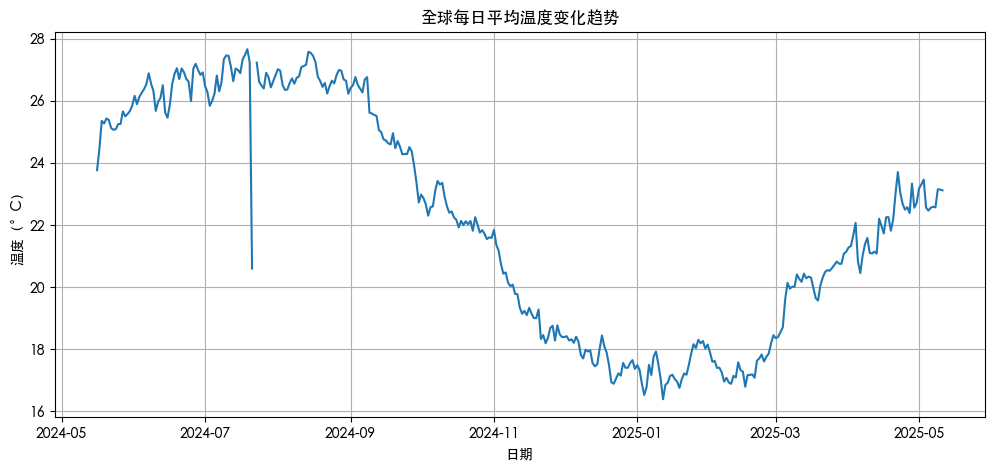

In [103]:
import matplotlib.pyplot as plt

# 将时间设置为索引（临时）
df_sorted = df_cleaned.set_index('last_updated')

# 取样或移动平均防止太密
temp_trend = df_sorted['temperature_celsius'].resample('D').mean()

plt.figure(figsize=(12, 5))
plt.plot(temp_trend)
plt.title("全球每日平均温度变化趋势")
plt.ylabel("温度（°C）")
plt.xlabel("日期")
plt.grid(True)
plt.show()

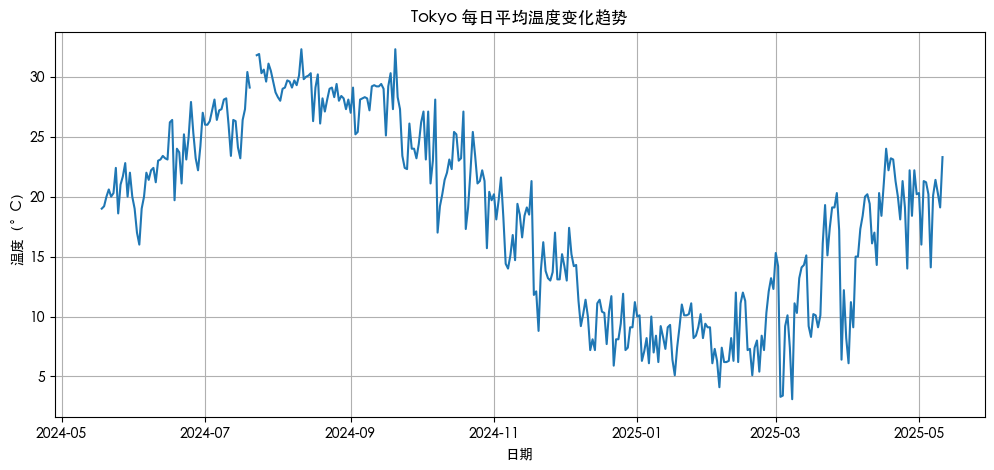

In [104]:
city_df = df_cleaned[df_cleaned['location_name'] == 'Tokyo']  # 举例 Tokyo

city_trend = city_df.set_index('last_updated')['temperature_celsius'].resample('D').mean()

plt.figure(figsize=(12, 5))
plt.plot(city_trend)
plt.title("Tokyo 每日平均温度变化趋势")
plt.ylabel("温度（°C）")
plt.xlabel("日期")
plt.grid(True)
plt.show()


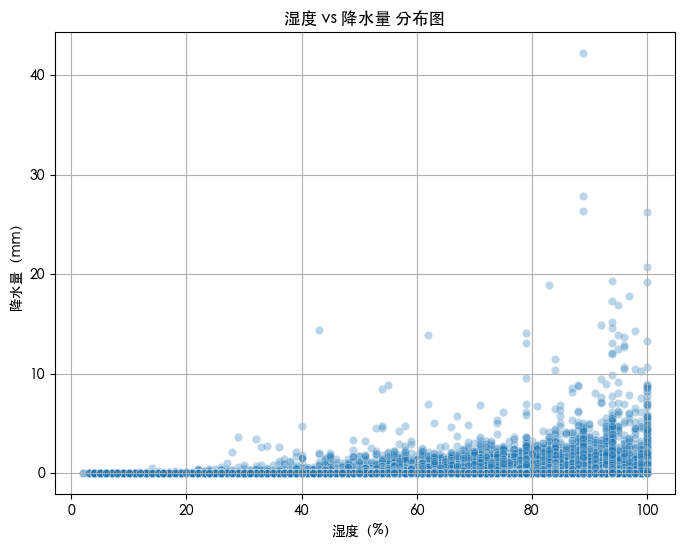

In [105]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='humidity', y='precip_mm', alpha=0.3)
plt.title("湿度 vs 降水量 分布图")
plt.xlabel("湿度（%）")
plt.ylabel("降水量（mm）")
plt.grid(True)
plt.show()

/var/folders/h5/52bhkqpn6yj21rdt5p47x0s80000gn/T/ipykernel_54802/3249332647.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned.drop(columns=['country', 'location_name']).corr(), annot=True, fmt='.2f', cmap='coolwarm')


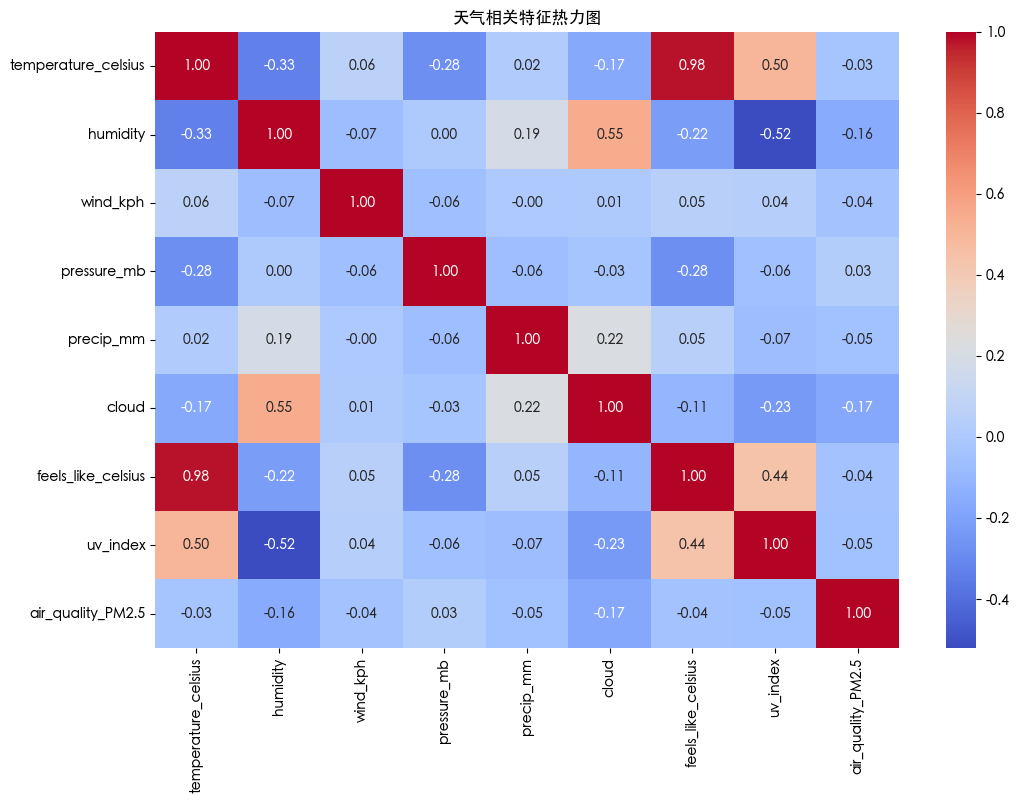

In [106]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.drop(columns=['country', 'location_name']).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("天气相关特征热力图")
plt.show()

## 建模分析

### 滑动窗口处理

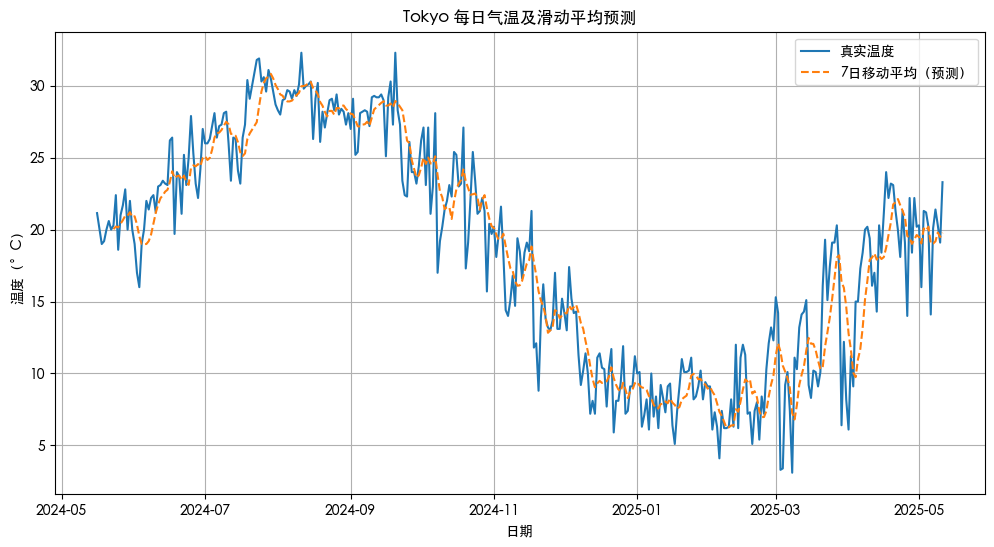

In [107]:
# 筛选城市数据
city_df = df_cleaned[df_cleaned['location_name'] == 'Tokyo'].copy()

# 设置时间为索引
city_df.set_index('last_updated', inplace=True)

# 按天聚合：计算每日平均温度
daily_temp = city_df['temperature_celsius'].resample('D').mean().dropna()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_temp, label='真实温度')
plt.plot(daily_temp.rolling(window=7).mean(), label='7日移动平均（预测）', linestyle='--')
plt.title("Tokyo 每日气温及滑动平均预测")
plt.xlabel("日期")
plt.ylabel("温度（°C）")
plt.legend()
plt.grid(True)
plt.show()

### 线性回归

In [108]:
def create_features(series, window_size=7):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size].values)
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

import numpy as np

X, y = create_features(daily_temp, window_size=7)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 建模
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 13.133595536036797
R²: 0.5527669670413184


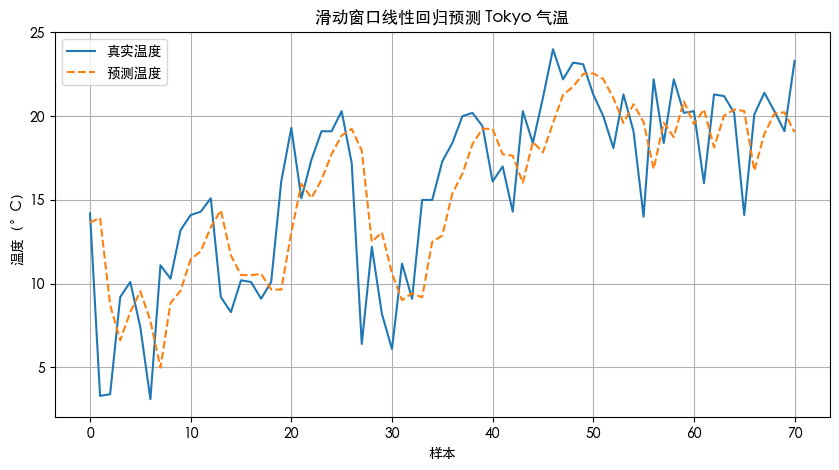

In [109]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, label='真实温度')
plt.plot(range(len(y_test)), y_pred, label='预测温度', linestyle='--')
plt.title("滑动窗口线性回归预测 Tokyo 气温")
plt.xlabel("样本")
plt.ylabel("温度（°C）")
plt.legend()
plt.grid(True)
plt.show()


### LSTM

In [110]:
features = [
    'temperature_celsius',   # 目标变量（也参与输入）
    'humidity',
    'wind_kph',
    'pressure_mb',
    'cloud',
    'precip_mm',
    'feels_like_celsius'
]

In [111]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 选择城市并提取特征
city_df = df_cleaned[df_cleaned['location_name'] == 'Tokyo'].copy()
city_df.set_index('last_updated', inplace=True)
selected = city_df[features].dropna()

# 归一化
scaler = MinMaxScaler()
selected_scaled = pd.DataFrame(scaler.fit_transform(selected), columns=features)

# 构造滑动窗口
def create_multivariate_dataset(df, target_col, window_size=7):
    X, y = [], []
    for i in range(len(df) - window_size):
        X.append(df.iloc[i:i+window_size].values)  # 多变量序列
        y.append(df.iloc[i+window_size][target_col])  # 预测目标：温度
    return np.array(X), np.array(y)

window_size = 7
X, y = create_multivariate_dataset(selected_scaled, target_col='temperature_celsius', window_size=window_size)

# 转为 Tensor
import torch

X_tensor = torch.tensor(X, dtype=torch.float32)  # [samples, 7, num_features]
y_tensor = torch.tensor(y, dtype=torch.float32)


In [112]:
train_size = int(len(X_tensor) * 0.8)
X_train, X_test = X_tensor[:train_size], X_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

In [113]:
class MultivariateLSTM(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)  # x: [batch, seq_len, features]
        out = self.fc(out[:, -1, :])  # 取最后一时刻的隐藏状态
        return out.squeeze()

In [114]:
input_size = len(features)  # 每个时间点有多个特征
model = MultivariateLSTM(input_size=input_size)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [115]:
epochs = 100
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 10, Loss: 0.1496
Epoch 20, Loss: 0.0428
Epoch 30, Loss: 0.0362
Epoch 40, Loss: 0.0334
Epoch 50, Loss: 0.0240
Epoch 60, Loss: 0.0160
Epoch 70, Loss: 0.0102
Epoch 80, Loss: 0.0081
Epoch 90, Loss: 0.0082
Epoch 100, Loss: 0.0078


In [116]:
model.eval()
with torch.no_grad():
    pred = model(X_test).numpy()

# 反归一化目标值
y_pred_rescaled = scaler.inverse_transform(
    np.concatenate([pred.reshape(-1, 1), X_test[:, -1, 1:].numpy()], axis=1)
)[:, 0]

y_test_rescaled = scaler.inverse_transform(
    np.concatenate([y_test.reshape(-1, 1), X_test[:, -1, 1:].numpy()], axis=1)
)[:, 0]

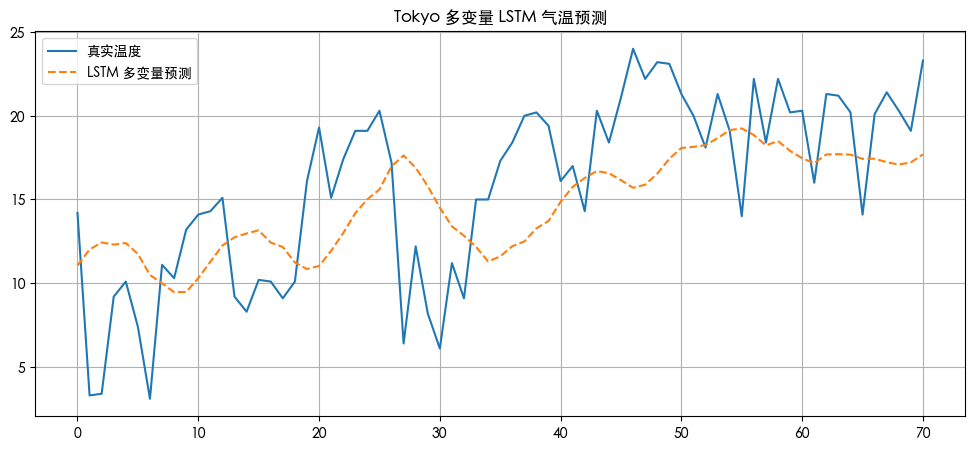

MAE: 3.9640567
RMSE: 4.6100736


In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.figure(figsize=(12, 5))
plt.plot(y_test_rescaled, label='真实温度')
plt.plot(y_pred_rescaled, label='LSTM 多变量预测', linestyle='--')
plt.legend()
plt.title("Tokyo 多变量 LSTM 气温预测")
plt.grid(True)
plt.show()

# 评估
print("MAE:", mean_absolute_error(y_test_rescaled, y_pred_rescaled))
print("RMSE:", np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled)))


### 加分类器预测天气

In [120]:
# 使用之前清洗过的 df 或 df_cleaned
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 选择用于分类的特征
classification_features = [
    'temperature_celsius', 'humidity', 'wind_kph',
    'pressure_mb', 'precip_mm', 'cloud', 'feels_like_celsius',
    'uv_index', 'air_quality_PM2.5'
]

df_classify = df[classification_features + ['condition_text']].dropna().copy()

# 编码天气标签
le = LabelEncoder()
df_classify['condition_label'] = le.fit_transform(df_classify['condition_text'])

# 拆出特征和标签
X = df_classify[classification_features].values
y = df_classify['condition_label'].values

print(f"样本数: {X.shape[0]}")
print(f"输入维度: {X.shape[1]}")
print(f"天气类型种类: {len(le.classes_)}")

样本数: 69967
输入维度: 9
天气类型种类: 47


#### 分类器

In [121]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 标准化输入
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 转为 tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [122]:
import torch.nn as nn

class WeatherClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(WeatherClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes)
        )

    def forward(self, x):
        return self.net(x)

In [123]:
input_size = X_train.shape[1]
hidden_size = 128
num_classes = len(np.unique(y))

model = WeatherClassifier(input_size, hidden_size, num_classes)


In [147]:
import torch.optim as optim

classifier = WeatherClassifier(input_size=9, hidden_size=128, num_classes=47)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

for epoch in range(200):
    classifier.train()
    optimizer.zero_grad()
    outputs = classifier(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 5 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")



Epoch 5, Loss: 3.6411
Epoch 10, Loss: 3.2932
Epoch 15, Loss: 2.8683
Epoch 20, Loss: 2.4300
Epoch 25, Loss: 2.1068
Epoch 30, Loss: 1.9345
Epoch 35, Loss: 1.8177
Epoch 40, Loss: 1.7121
Epoch 45, Loss: 1.6367
Epoch 50, Loss: 1.5731
Epoch 55, Loss: 1.5185
Epoch 60, Loss: 1.4770
Epoch 65, Loss: 1.4394
Epoch 70, Loss: 1.4102
Epoch 75, Loss: 1.3822
Epoch 80, Loss: 1.3566
Epoch 85, Loss: 1.3379
Epoch 90, Loss: 1.3166
Epoch 95, Loss: 1.3014
Epoch 100, Loss: 1.2852
Epoch 105, Loss: 1.2687
Epoch 110, Loss: 1.2545
Epoch 115, Loss: 1.2414
Epoch 120, Loss: 1.2288
Epoch 125, Loss: 1.2163
Epoch 130, Loss: 1.2050
Epoch 135, Loss: 1.1942
Epoch 140, Loss: 1.1831
Epoch 145, Loss: 1.1738
Epoch 150, Loss: 1.1629
Epoch 155, Loss: 1.1577
Epoch 160, Loss: 1.1498
Epoch 165, Loss: 1.1418
Epoch 170, Loss: 1.1344
Epoch 175, Loss: 1.1243
Epoch 180, Loss: 1.1221
Epoch 185, Loss: 1.1160
Epoch 190, Loss: 1.1099
Epoch 195, Loss: 1.1040
Epoch 200, Loss: 1.0996


In [149]:
model.eval()
with torch.no_grad():
    preds = classifier(X_test_tensor)
    predicted_classes = preds.argmax(dim=1)
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy.item():.4f}")

Test Accuracy: 0.6727


#### 预测特征接入分类器预测天气

In [153]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# 设置为 CPU 运行
device = torch.device("cpu")

# Step 1: 读取并预处理数据
df = pd.read_csv("data/GlobalWeatherRepository.csv")  # 注意路径
df = df[df['location_name'] == 'Tokyo'].copy()
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')
df = df.sort_values('last_updated')

# 使用分类器的9个特征
features = [
    'temperature_celsius', 'humidity', 'wind_kph',
    'pressure_mb', 'precip_mm', 'cloud',
    'feels_like_celsius', 'uv_index', 'air_quality_PM2.5'
]

df = df.dropna(subset=features)

# Step 2: 构建滑动窗口序列数据
def create_sequence_dataset(df, input_cols, target_cols, window_size=7):
    X, y = [], []
    for i in range(len(df) - window_size):
        seq_x = df[input_cols].iloc[i:i + window_size].values
        seq_y = df[target_cols].iloc[i + window_size].values
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

X_seq, y_seq = create_sequence_dataset(df, features, features)

# Step 3: 标准化
input_scaler = StandardScaler()
target_scaler = StandardScaler()

X_scaled = input_scaler.fit_transform(X_seq.reshape(-1, 9)).reshape(X_seq.shape)
y_scaled = target_scaler.fit_transform(y_seq)

# Step 4: 转为 Tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)

# Step 5: 拆分训练集和测试集
train_size = int(0.8 * len(X_tensor))
X_train, X_test = X_tensor[:train_size], X_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)

# Step 6: 定义 LSTM 网络
class WeatherLSTM(nn.Module):
    def __init__(self, input_size=9, hidden_size=64, output_size=9):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])  # 只取最后一步输出

model = WeatherLSTM().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Step 7: 模型训练
epochs = 100
for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {epoch_loss / len(train_loader):.4f}")

# Step 8: 模型预测 + 反标准化
model.eval()
with torch.no_grad():
    y_pred = model(X_test.to(device)).cpu().numpy()
    y_true = y_test.cpu().numpy()

    y_pred_rescaled = target_scaler.inverse_transform(y_pred)
    y_true_rescaled = target_scaler.inverse_transform(y_true)

# Step 9: 输出前几条预测结果
for i in range(5):
    print(f"【样本 {i+1}】")
    print("真实:", np.round(y_true_rescaled[i], 2))
    print("预测:", np.round(y_pred_rescaled[i], 2))
    print()


Epoch 1, Loss: 0.9596
Epoch 2, Loss: 0.8673
Epoch 3, Loss: 0.7504
Epoch 4, Loss: 0.6138
Epoch 5, Loss: 0.5604
Epoch 6, Loss: 0.5393
Epoch 7, Loss: 0.5256
Epoch 8, Loss: 0.5179
Epoch 9, Loss: 0.5106
Epoch 10, Loss: 0.5031
Epoch 11, Loss: 0.4951
Epoch 12, Loss: 0.4916
Epoch 13, Loss: 0.4872
Epoch 14, Loss: 0.4815
Epoch 15, Loss: 0.4768
Epoch 16, Loss: 0.4728
Epoch 17, Loss: 0.4687
Epoch 18, Loss: 0.4618
Epoch 19, Loss: 0.4590
Epoch 20, Loss: 0.4532
Epoch 21, Loss: 0.4498
Epoch 22, Loss: 0.4469
Epoch 23, Loss: 0.4426
Epoch 24, Loss: 0.4409
Epoch 25, Loss: 0.4486
Epoch 26, Loss: 0.4345
Epoch 27, Loss: 0.4297
Epoch 28, Loss: 0.4293
Epoch 29, Loss: 0.4252
Epoch 30, Loss: 0.4234
Epoch 31, Loss: 0.4186
Epoch 32, Loss: 0.4166
Epoch 33, Loss: 0.4161
Epoch 34, Loss: 0.4102
Epoch 35, Loss: 0.4075
Epoch 36, Loss: 0.4055
Epoch 37, Loss: 0.4144
Epoch 38, Loss: 0.3995
Epoch 39, Loss: 0.4066
Epoch 40, Loss: 0.3925
Epoch 41, Loss: 0.3906
Epoch 42, Loss: 0.3892
Epoch 43, Loss: 0.3875
Epoch 44, Loss: 0.38

In [154]:
# Step 1：选择一条 LSTM 预测结果作为输入
one_day_features = y_pred_rescaled[0].reshape(1, -1)  # shape: (1, 9)

# Step 2：转成 tensor
input_tensor = torch.tensor(one_day_features, dtype=torch.float32)

# Step 3：调用分类模型预测天气类型
classifier.eval()
with torch.no_grad():
    logits = classifier(input_tensor)
    pred_class_index = torch.argmax(logits, dim=1).item()

# Step 4：还原标签名称
pred_weather = le.inverse_transform([pred_class_index])[0]
print(f"预测天气类型：{pred_weather}")

预测天气类型：Partly cloudy


## 地理差异分析

/var/folders/h5/52bhkqpn6yj21rdt5p47x0s80000gn/T/ipykernel_54802/3365347610.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['continent'] = df_cleaned['timezone'].str.extract(r'(^[^/]+)')


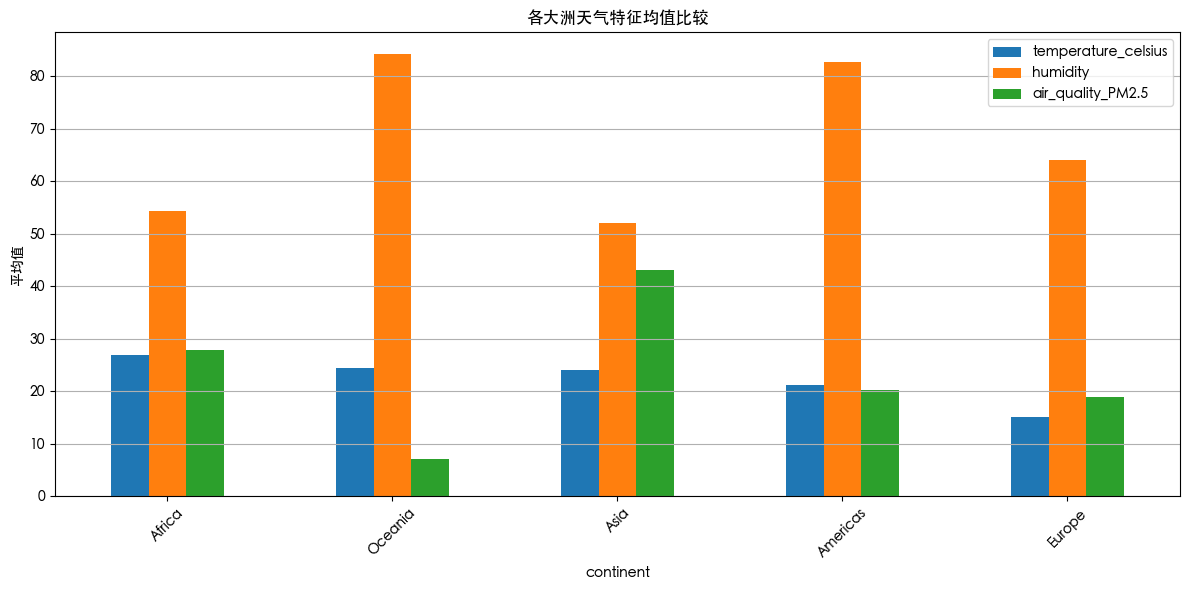

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 df_cleaned 是你已经预处理好的 DataFrame（包含 timezone、temperature、humidity 等）
# 添加 continent 字段
df_cleaned['continent'] = df_cleaned['timezone'].str.extract(r'(^[^/]+)')

continent_map = {
    'Asia': 'Asia',
    'Europe': 'Europe',
    'Africa': 'Africa',
    'America': 'Americas',     # 包括北美和南美
    'Australia': 'Oceania',
    'Pacific': 'Oceania',
    'Antarctica': 'Antarctica'
}

df_cleaned = df[selected_features].dropna().copy()

df_cleaned['continent'] = df_cleaned['timezone'].str.extract(r'(^[^/]+)')
df_cleaned['continent'] = df_cleaned['continent'].map(continent_map)


# 选出需要的列
geo_features = ['continent', 'temperature_celsius', 'humidity', 'air_quality_PM2.5']
df_geo = df_cleaned[geo_features].dropna()

# 按大陆聚合计算平均值
continent_stats = df_geo.groupby('continent').agg({
    'temperature_celsius': 'mean',
    'humidity': 'mean',
    'air_quality_PM2.5': 'mean'
}).sort_values('temperature_celsius', ascending=False)

# 可视化
continent_stats.plot(kind='bar', figsize=(12, 6), title='各大洲天气特征均值比较')
plt.ylabel("平均值")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
